# Introduction

In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import mplcursors
import plotly.express as px

## Load Data

In [3]:
#Load national data from SSA
names_df = pd.read_csv("Data/national_data.csv")
#Load state data from SSA
states_df = pd.read_csv("Data/states_data.csv")

### Trends in Names Over Time

In [7]:
#Create function to plot a single name over time
def plot_name_trend(names_df, name_to_plot):
    """
    Plot the trend of a specific name over time.

    Parameters:
        names_df (DataFrame): DataFrame containing name data.
        name_to_plot (str): Name for which the trend will be plotted.
    """
    # Filter data for the specified name
    name_data = names_df[names_df['name'] == name_to_plot]
    
    # Aggregate counts by year
    name_counts_by_year = name_data.groupby('year')['count'].sum().reset_index()

    # Plot the trend
    plt.figure(figsize=(10, 6))
    plt.plot(name_counts_by_year['year'], name_counts_by_year['count'], marker='o')

    # Add labels and title
    plt.title(f'Trend of Name "{name_to_plot}" Over Time')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()

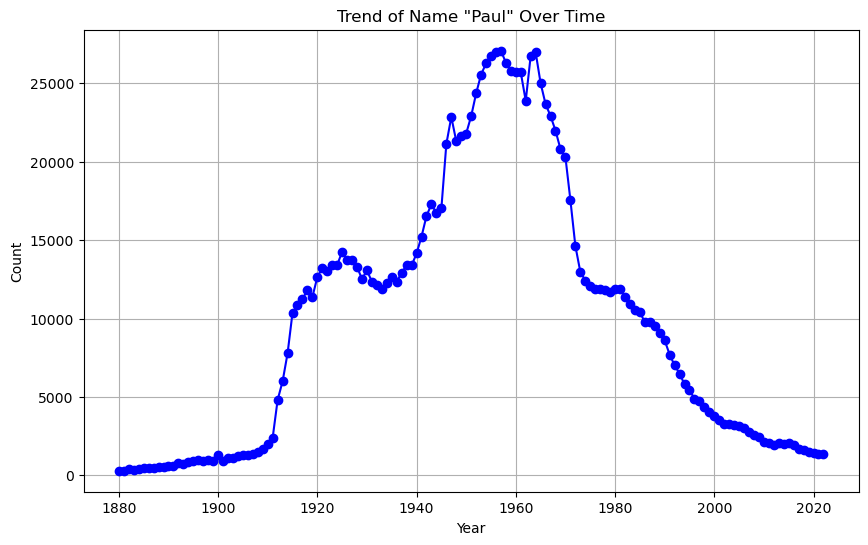

In [72]:
# Plot example name
plot_name_trend(names_df, 'Paul')

### Data by Name and Gender

In [68]:
def plot_name_over_time(names_df, name):
    """
    Plot occurrences of a single name by sex over time. 

    Parameters:
        names_df (DataFrame): DataFrame containing name data.
        name (str): Name in dataset
    """
    # Filter data for the specified name and separate by sex
    male_data = names_df[(names_df['name'] == name) & (names_df['sex'] == 'M')]
    female_data = names_df[(names_df['name'] == name) & (names_df['sex'] == 'F')]

    # Plot occurrences over time for male and female
    plt.figure(figsize=(10, 6))
    plt.plot(male_data['year'], male_data['count'], label='Male')
    plt.plot(female_data['year'], female_data['count'], label='Female')
    
    # Add labels and title
    plt.title(f'Differences of Name "{name}" by Sex Over Time')
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.legend()
    plt.grid(True)
    plt.show()

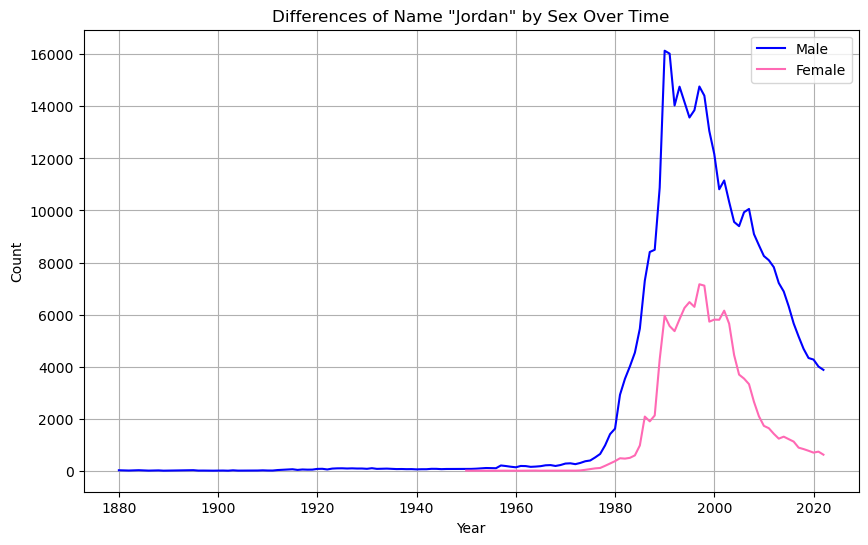

In [69]:
plot_name_over_time(names_df, 'Jordan')

In [75]:
def compare_names_across_genders(names_df, names_to_compare):
    """
    Compare the popularity of multiple names across genders.

    Parameters:
        names_df (DataFrame): DataFrame containing name data.
        names_to_compare (list): List of names to compare.
    """
    # Filter data for the specified names
    filtered_data = names_df[names_df['name'].isin(names_to_compare)]

    # Set custom color palette
    colors = {'M': '#000080',  # Navy Blue for 'M'
              'F': '#FF69B4'}  # Hot Pink for 'F'

    # Plot the comparison
    plt.figure(figsize=(10, 6))
    sns.barplot(data=filtered_data, x='name', y='count', hue='sex', palette=colors)
    plt.title('Popularity of Names Across Genders')
    plt.xlabel('Name')
    plt.ylabel('Count')
    plt.legend(title='Gender')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()


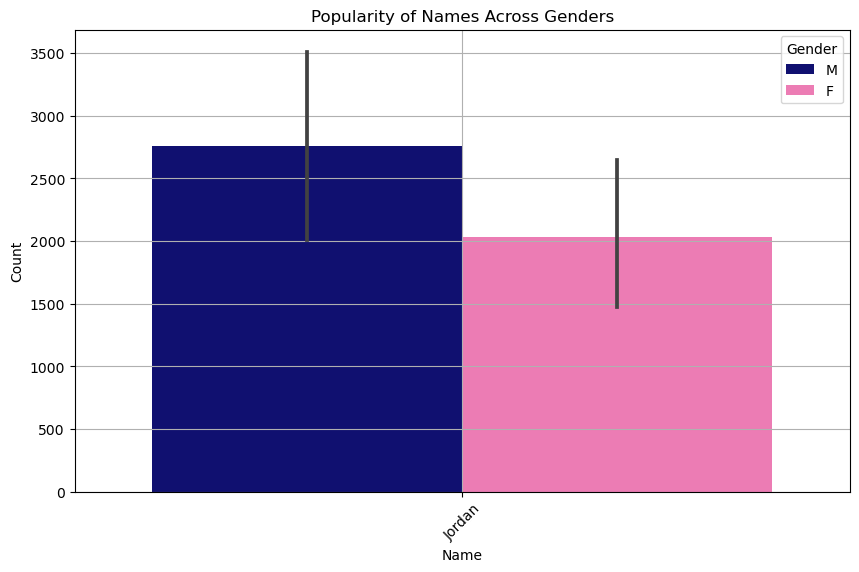

In [76]:
# Plot example names
compare_names_across_genders(names_df, ['Jordan', 'Jordan'])

### Top Names per Year

In [59]:
def plot_top_names_in_year(names_df, selected_year, sex=None, N=10):
    """
    Plot the top N names in a specific year for a specified sex ('M', 'F', or None for both).

    Parameters:
        names_df (DataFrame): DataFrame containing name data.
        selected_year (int): Year for which to plot the top names.
        sex (str or None): Sex for which to plot the top names ('M', 'F', or None for both). Default is None.
        N (int): Number of top names to display (default is 10).
    """
    # Define color palette for each sex
    colors = {'M': '#000080',  # Navy Blue for 'M'
              'F': '#FF69B4'}  # Hot Pink for 'F'

    # Select data for the specified year and sex
    if sex:
        selected_year_data = names_df[(names_df['year'] == selected_year) & (names_df['sex'] == sex)]
    else:
        selected_year_data = names_df[names_df['year'] == selected_year]
        
    # Check if the selected_year_data is empty
    if selected_year_data.empty:
        print(f"No data available for the selected year {selected_year} and sex {sex}.")
        return

    # Group by name and sum counts, then select the top N names
    top_names = selected_year_data.groupby('name')['count'].sum().sort_values(ascending=False).head(N)

    # Plot the bar chart
    plt.figure(figsize=(12, 6))
    if sex is None:
        color_palette = ['#808080'] * N  # Default color: Gray
    else:
        color_palette = [colors[sex] for _ in range(N)]
    sns.barplot(x=top_names.index, y=top_names.values, palette=color_palette, order=top_names.index)
    plt.title(f'Top {N} Names in {selected_year} ({sex if sex else "Both Sexes"})')
    plt.xlabel('Name')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

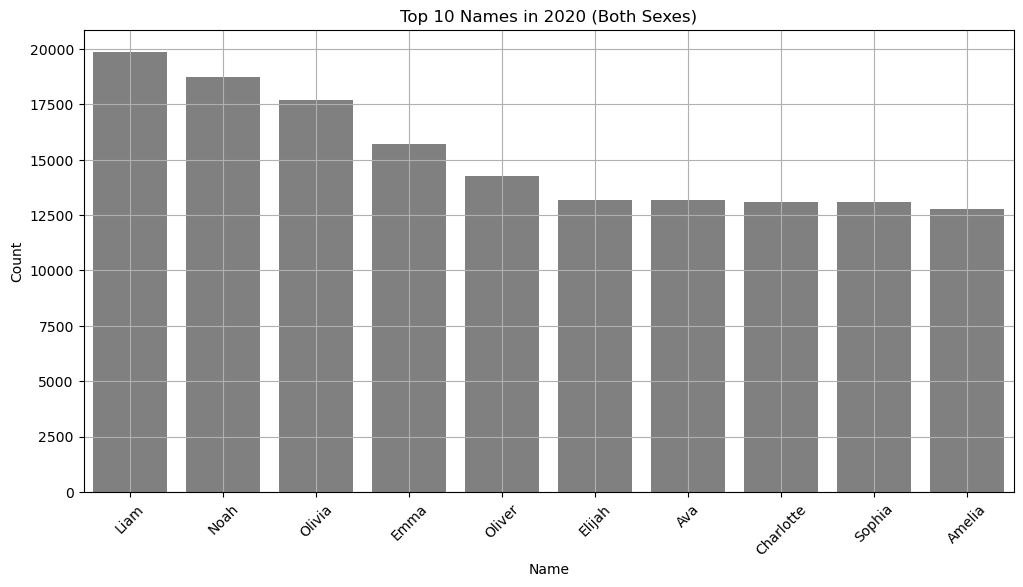

In [60]:
plot_top_names_in_year(names_df, 2020, sex=None, N=10)

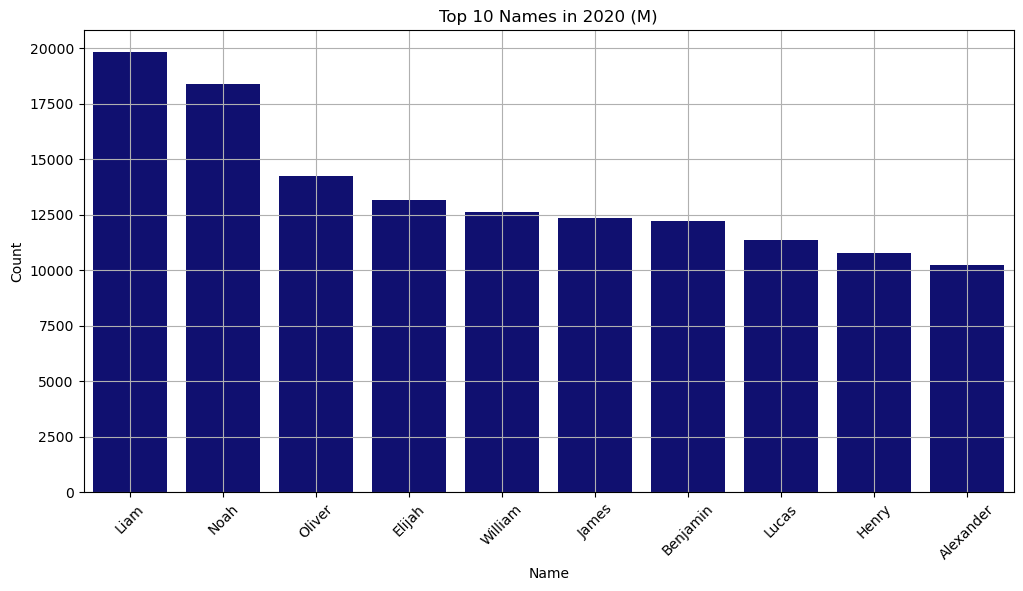

In [61]:
plot_top_names_in_year(names_df, 2020, sex='M', N=10)

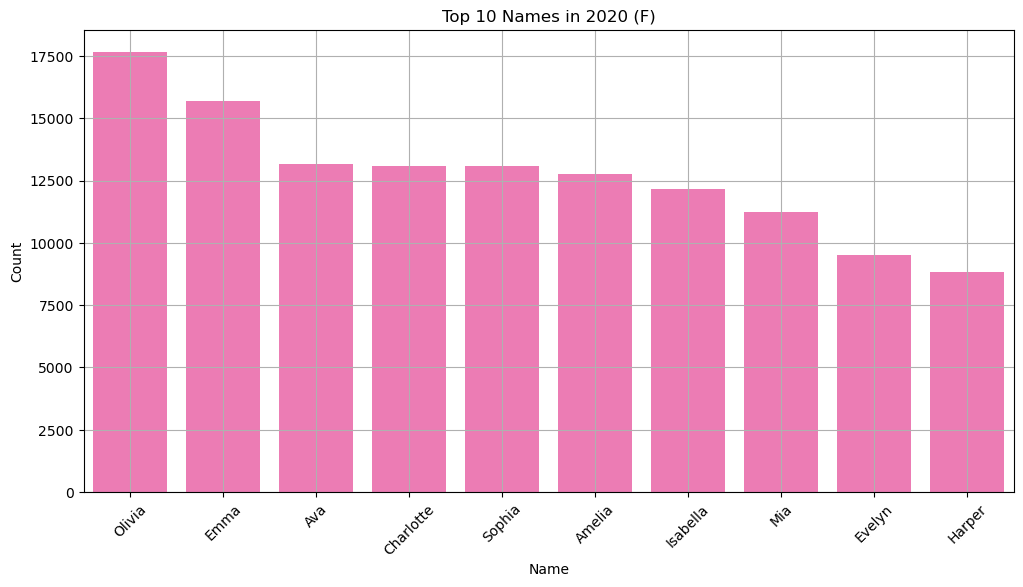

In [62]:
plot_top_names_in_year(names_df, 2020, sex='F', N=10)